##Customer Shopping Behavior

#Goal of the project:
To analyze customer shopping behavior and identify patterns related to age, gender, product categories, purchase amount, payment methods, and loyalty indicators.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_shopping_behavior.csv')

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

This dataset helps analyze customer behavior, spending patterns, loyalty, and preferences.

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3863.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750065,25.351538
std,1125.977353,15.207589,23.685392,0.716983,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.800000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [8]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [9]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns ={'purchase_amount_(usd)':'purchase_amount'})


In [10]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [11]:
median_per_category = df.groupby('category')['review_rating'].median()
df['review_rating'] = df['review_rating'].fillna(df['category'].map(median_per_category))


Filled missing Review Rating values using median of each category.

In [12]:
df.isnull().sum()

,0
customer_id,0
age,0
gender,0
item_purchased,0
category,0
purchase_amount,0
location,0
size,0
color,0
season,0


In [13]:
#create new column age_group
labels = ['Young','Adult','Middle-Aged','Senior']
df['age_group'] = pd.qcut(df['age'],q=4, labels = labels)

Creating age groups using quartiles.

In [14]:
df[['age','age_group']].head()

,age,age_group
0,55,Middle-Aged
1,19,Young
2,50,Middle-Aged
3,21,Young
4,45,Middle-Aged


In [15]:
#create a column purchase_frequency_days
frequency_mapping = {
    'Fortnightly':14,
    'Weekly':7,
    'Monthly':30,
    'Quarterly':90,
    'Bi-Weekly':14,
    'Annually':365,
    'Every 3 Months':90
}

df['purchase_frequency_days']= df['frequency_of_purchases'].map(frequency_mapping)

Converts text to numeric days

In [16]:
df[['purchase_frequency_days', 'frequency_of_purchases']].head()

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually


In [17]:
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [18]:
(df['discount_applied']==df['promo_code_used']).all()

np.True_

In [19]:
df=df.drop('promo_code_used',axis=1)

In [20]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

##QUESTIONS
1. Which age group has the highest average purchase amount?

In [22]:
age_spend = df.groupby('age_group')['purchase_amount'].mean().reset_index()

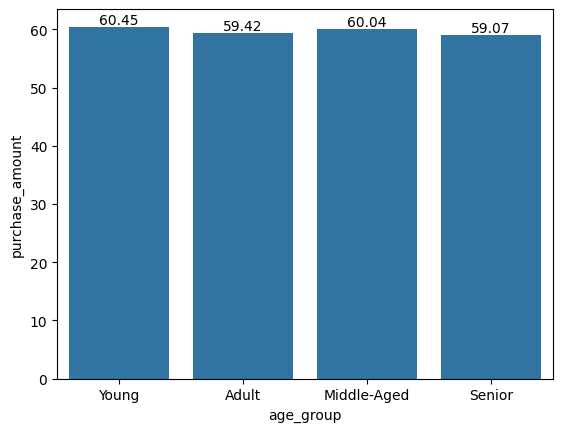

In [24]:
ax = sns.barplot(x='age_group', y='purchase_amount', data=age_spend)

for container in ax.containers:
  ax.bar_label(container,fmt='%.2f')

Observation:

young and Middle-Aged customers have the highest average purchase amount.

adult customers spend show moderate spending behavior.

Senior customers  spend comparatively less.

2. Which product category contributes most to revenue?

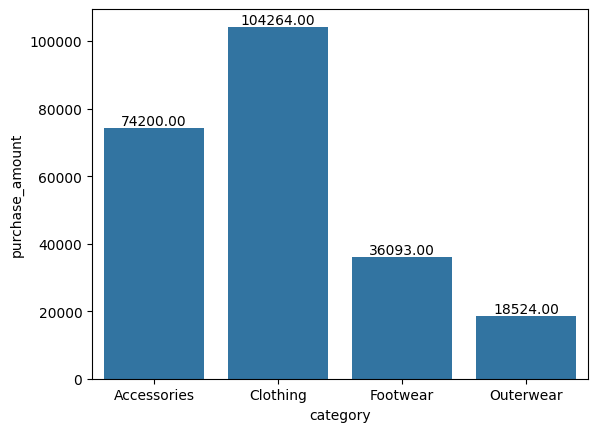

In [25]:
category_revenue = df.groupby('category')['purchase_amount'].sum().reset_index()
ax = sns.barplot(x='category', y='purchase_amount', data=category_revenue)
for container in ax.containers:
  ax.bar_label(container, fmt='%.2f')

Observation:

clothing category contribute significantly higher revenue than others.

3. Do customers spend more when a discount is applied?

<Axes: xlabel='discount_applied', ylabel='purchase_amount'>

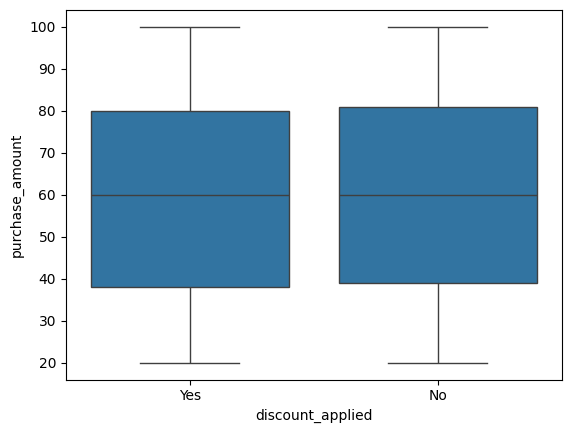

In [30]:
sns.boxplot(data=df, x='discount_applied', y='purchase_amount')

4. Relationship between PURCHASE FREQUENCY DAYS & spending

<Axes: xlabel='purchase_frequency_days', ylabel='purchase_amount'>

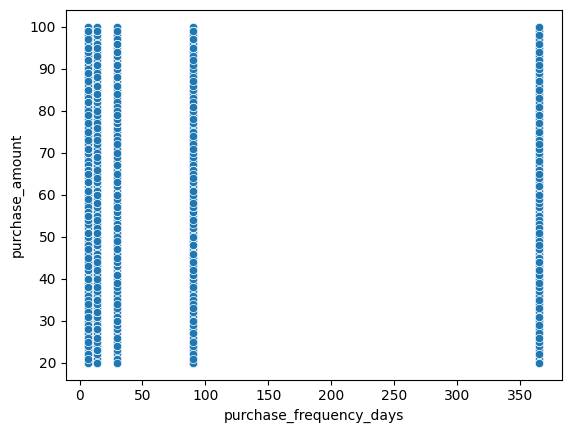

In [31]:
sns.scatterplot(data=df, x='purchase_frequency_days', y= 'purchase_amount')

5. Which age group uses discounts the most?

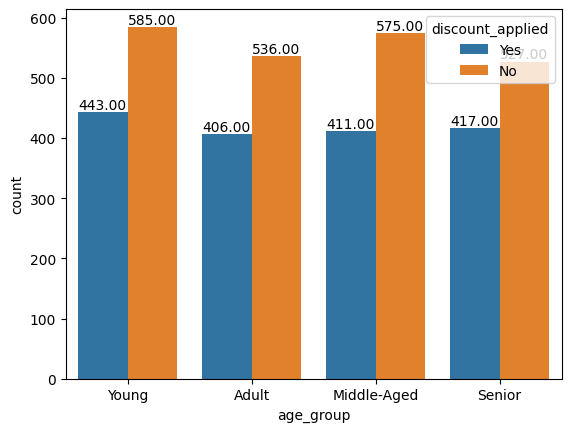

In [38]:
ax = sns.countplot(data=df, x='age_group', hue= 'discount_applied')
for container in ax.containers:
  ax.bar_label(container, fmt='%.2f')

Observation:

young and senior customers use discounts more frequently.

senior customers show comparatively lower discount usage.

6. What are the top 5 revenue-generating categories?

<Axes: xlabel='purchase_amount', ylabel='category'>

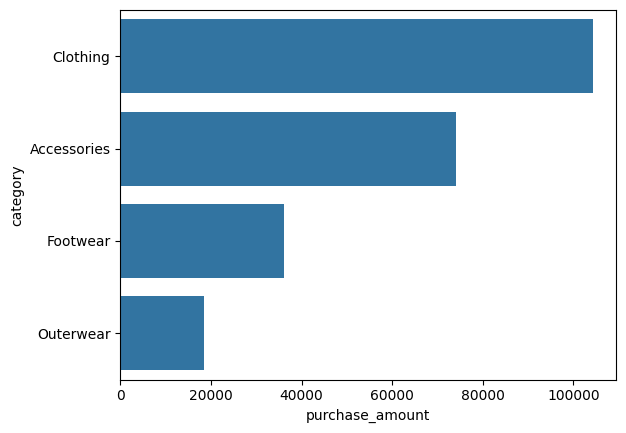

In [37]:
top_categories = (
    df.groupby('category')['purchase_amount']
    .sum().sort_values(ascending=False)
    .head(5).reset_index())
sns.barplot(data=top_categories, x='purchase_amount', y='category')


Observation:

The top 5 categories contribute a major share of total revenue.

Remaining categories have relatively smaller impact.

#HERE on connection vscode to SQL Server

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import urllib



In [ ]:
params = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 18 for SQL Server};"
    "SERVER=DESKTOP-VQRE2OP\\SQLEXPRESS;"
    "DATABASE=csba;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;"
)

engine = create_engine(
    "mssql+pyodbc:///?odbc_connect=%s" % params
)


In [ ]:
df.to_sql(
    name="customer_shopping_analysis",
    con=engine,
    if_exists="replace",
    index=False
)

print("✅ Analysis data successfully sent to MSSQL")
